# PROJETO DE PDI
# GRUPO: YAN BORGES, VLADIMIR YURI, VÍTOR ZIMBRUNES E JOÃO NETO

## IMPORTAÇÃO DE BIBLIOTECAS

In [116]:
from PIL import Image
import matplotlib.image as mat_im
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import math

## CRIAÇÃO DAS FUNÇÕES PARA ABRIR, SALVAR E MANIPULAR UM ARQUIVO

In [160]:
#FUNÇÃO PARA ABRIR E EXIBIR
def open_image(img):
  image = Image.open(img)
  return image

#FUNÇÃO PARA SALVAR
def save_image(img, name, ext):
  image = img.save(f"{name}.{ext}")
  return image

#FUNÇÃO PARA VISUALIZAR DIMENSÕES
def dim_image(img):
  RGB = mat_im.imread(img)
  shape_img = RGB.shape
  print(f'PIXELS: {shape_img[0]}x{shape_img[1]}\nCANAIS DE CORES: {shape_img[2]}')

#FUNÇÃO PARA TRANSFORMAR SISTEMAS
def RGB_to_HSB(img):
  #RECUPERA A MATRIZ DE PIXELS
  RGB = mat_im.imread(img)
  #m = linhas, n = colunas
  m,n = RGB.shape[0], RGB.shape[1]

  #Aloca as respectivas cores nos vetores apropriados
  R = np.array([RGB[i][j][0] for j in range(n) for i in range(m)]) #RED
  G = np.array([RGB[i][j][1] for j in range(n) for i in range(m)]) #GREEN
  B = np.array([RGB[i][j][2] for j in range(n) for i in range(m)]) #BLUE

  R = R/255.0
  G = G/255.0
  B = B/255.0

  H = []
  S = []
  V = []

  for i in range(len(R)):
    min_value = min(R[i], G[i], B[i])

    max_array = np.array([R[i], G[i], B[i]])
    max_value = max_array.max()

    if(max_value == min_value):
      H.append('Matiz Indefinida')

    elif(max_value == max_array[0] and G[i] >= B[i]): #A posição 0 indica R
      H.append(round((60 * ((G[i]-B[i])/(max_value-min_value)) + 0),2))

    elif(max_value == max_array[0] and G[i] < B[i]):
      H.append(round((60 * ((G[i]-B[i])/(max_value-min_value)) + 360),2))

    elif(max_value == max_array[1]):
      H.append(round((60 * ((B[i]-R[i])/(max_value-min_value)) + 120),2))

    elif(max_value == max_array[2]):
      H.append(round((60 * ((G[i]-B[i])/(max_value-min_value)) + 240),2))

    if(max_value == 0):
      S.append(0)
    elif(max_value != 0):
      S.append(round((1 - (min_value/max_value)),2))

    V.append(max_value)

  HSB = [[H[i], S[i], V[i]] for i in range(len(H))]

  return HSB

def HSB_to_RGB(data):
  H = data['H'].values
  S = data['S'].values
  V = data['B'].values

  r = []
  g = []
  b = []

  R = 0
  G = 0
  B = 0

  for i in range(len(H)):
    if(S[i] == 0):
      R = G = B = V[i]
    else:
      Sec_Pos = H[i]/60
      Sec_Number = int(math.floor(Sec_Pos))

      Sec_Frac = Sec_Pos - Sec_Number

      p = V[i]*(1.0 - S[i])
      q = V[i]*(1.0 - (S[i]*Sec_Frac))
      t = V[i]*(1.0 - (S[i]*(1 - Sec_Frac)))

      if(Sec_Number == 0):
        R = V[i]
        G = t
        B = p
      elif(Sec_Number == 1):
        R = q
        G = V[i]
        B = p
      elif(Sec_Number == 2):
        R = p
        G = V[i]
        B = t
      elif(Sec_Number == 3):
        R = p
        G = q
        B = V[i]
      elif(Sec_Number == 4):
        R = t
        G = p
        B = V[i]
      elif(Sec_Number == 5):
        R = V[i]
        G = p
        B = q

    r.append(R)
    g.append(G)
    b.append(B)

  RGB = [[r[i], g[i], b[i]] for i in range(len(H))]

  return RGB

#FUNÇÃO PARA MODIFICAR
#def mod_image(img)

## TESTE COM IMAGEM

In [142]:
#Aqui, copie o caminho da imagem escolhida
img = "/content/270px-Metal_Gear_Solid_2_capa.png"

In [143]:
#Abre a imagem
new_image = open_image(img)

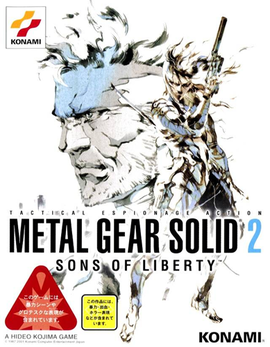

In [144]:
new_image

In [145]:
#Salva a imagem
name = str(input("Informe um nome para a imagem: "))
ext = str(input("Informe a extensão da imagem: "))

saved_image = save_image(new_image, name, ext)

Informe um nome para a imagem: EXEPLO
Informe a extensão da imagem: png


# 2-) CONVERSÃO RGB-HSB-RGB

## VISUALIZAÇÃO DE DIMENSÃO

In [146]:
path = f'/content/{name}.{ext}'

In [147]:
dim_image(path)

PIXELS: 347x270
CANAIS DE CORES: 3


## CONVERTE A IMAGEM PARA HSB

In [148]:
HSB = RGB_to_HSB(path)

In [149]:
HSB = pd.DataFrame(HSB)
HSB.columns = ['H', 'S', 'B']

In [150]:
HSB

,H,S,B
0,Matiz Indefinida,0.0,0.003922
1,Matiz Indefinida,0.0,0.003922
2,Matiz Indefinida,0.0,0.003922
3,Matiz Indefinida,0.0,0.003922
4,Matiz Indefinida,0.0,0.003922
...,...,...,...
93685,Matiz Indefinida,0.0,0.003922
93686,Matiz Indefinida,0.0,0.003922
93687,Matiz Indefinida,0.0,0.003922
93688,Matiz Indefinida,0.0,0.003922


## CONVERTE A IMAGEM PARA RGB

In [166]:
RGB = HSB_to_RGB(HSB)

In [ ]:
RGB